In [61]:
import pyshark as ps
import matplotlib.pyplot as plt
import numpy as np
import re
import pprint as pp
from datetime import datetime
from collections import OrderedDict, defaultdict
from scalogram import *

In [48]:
cap = ps.FileCapture("../../../shared/split.pcapng", only_summaries=True)
#summary_description = ['delta', 'destination', 'info', 'ip id', 'length', 'no', 'protocol', 'source', 'stream', 'summary_line', 'time', 'window']

In [6]:
cap = ps.FileCapture("../../../shared/split.pcapng")

In [7]:
tcp_1 = cap[0]
ssl_1 = cap[1]
time = (ssl_1.sniff_time.toordinal(), int(ssl_1.sniff_time.timestamp()))
print(ssl_1.ip.dst.get_default_value())

212.113.167.177


In [8]:
private_ip_pattern = re.compile("(^127\.)|(^10\.)|(^172\.1[6-9]\.)|(^172\.2[0-9]\.)|(^172\.3[0-1]\.)|(^192\.168\.)")

download = defaultdict(list)
upload = defaultdict(list)
up_count = 0
down_count = 0
for pkt in cap:
    if hasattr(pkt, 'ip'):
        if private_ip_pattern.match(pkt.ip.src.get_default_value()):
            up_count += 1
            upload[pkt.sniff_time.toordinal(), int(pkt.sniff_time.timestamp())].append(pkt)
        elif private_ip_pattern.match(pkt.ip.dst.get_default_value()):
            down_count += 1
            download[pkt.sniff_time.toordinal(), int(pkt.sniff_time.timestamp())].append(pkt)
        else:
            print("Curious!\n", pkt)
    elif hasattr(pkt, 'ipv6'):
        print("not yet implemented")
        # TODO    
up_ordered = OrderedDict(sorted(upload.items(), key=lambda t: t[0]))
down_ordered= OrderedDict(sorted(download.items(), key=lambda t: t[0]))

In [49]:
print("Uploaded: ", up_count)
print("Download: ", down_count)

Uploaded:  3668
Download:  3832


In [50]:
# Now we'll use reduces in each list to get good juicy info
stats = {}
up = defaultdict(list)
down = defaultdict(list)
byte_count = defaultdict(list)

for pkts in up_ordered.values():
    up['byte_count'].append(sum(int(pkt.captured_length) for pkt in pkts))
    up['packet_count'].append(len(pkts))
for pkts in down_ordered.values():
    down['byte_count'].append(sum(int(pkt.captured_length) for pkt in pkts))
    down['packet_count'].append(len(pkts))
stats['up'] = up
stats['down'] = down
pp.pprint(stats)

{'down': defaultdict(<class 'list'>,
                     {'byte_count': [121480,
                                     1903440,
                                     2820620,
                                     1453413,
                                     929,
                                     965592,
                                     1300822,
                                     1797049,
                                     1556011,
                                     2526706,
                                     542824],
                      'packet_count': [24,
                                       336,
                                       642,
                                       290,
                                       6,
                                       216,
                                       385,
                                       567,
                                       539,
                                       723,
                          

In [124]:

def calcScalogram(data):    
    N=11
    dj=1/128
    s0=2
    J=1/dj * np.log2(0.5*N/s0)
    scales=s0*2**(np.arange(J)*dj)
    S,scales= scalogramCWT(data,scales)
    return S,scales


In [133]:
def calc_and_show(data, color):
    scalo, scales = calcScalogram(data)
    print(scalo)
    plt.plot(scales,scalo, color, lw=3)
    plt.show()

[0.00319917 0.0033592  0.00352371 0.0036926  0.00386575 0.00404306
 0.0042244  0.00440965 0.00459866 0.00479133 0.00498752 0.00518713
 0.00539004 0.00559617 0.00580547 0.00601787 0.00623336 0.00645197
 0.00667374 0.00689877 0.0071272  0.00735922 0.00759508 0.00783509
 0.0080796  0.00832906 0.00858396 0.00884488 0.00911246 0.00938744
 0.00967059 0.0099628  0.01026501 0.01057825 0.01090359 0.0112422
 0.01159529 0.01196414 0.01235007 0.01275444 0.01317864 0.01362411
 0.01409226 0.01458451 0.01510229 0.01564697 0.01621988 0.01682228
 0.01745537 0.01812023 0.01881783 0.019549   0.02031441 0.02111454
 0.02194969 0.02281993 0.02372511 0.0246648  0.02563831 0.02664468
 0.02768264 0.02875062 0.02984672 0.03096874 0.03211417 0.03328016
 0.03446359 0.03566101 0.03686872 0.03808276 0.03929894 0.04051286
 0.04171998 0.04291561 0.044095   0.04525334 0.04638585 0.04748782
 0.04855463 0.04958184 0.05056523 0.05150086 0.0523851  0.05321468
 0.05398674 0.05469888 0.05534918 0.05593619 0.05645901 0.05691

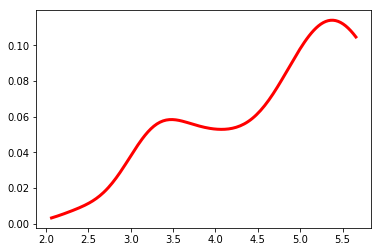

[0.0067472  0.00704289 0.00734245 0.00764527 0.00795068 0.008258
 0.00856653 0.00887555 0.00918433 0.00949214 0.00979826 0.01010198
 0.01040263 0.01069955 0.01099214 0.01127986 0.01156223 0.01183883
 0.01210934 0.01237354 0.0126313  0.01288261 0.01312759 0.01336646
 0.01359961 0.01382755 0.01405094 0.01427057 0.01448741 0.01470253
 0.0149172  0.01513277 0.01535077 0.01557284 0.01580073 0.01603631
 0.01628152 0.0165384  0.01680904 0.01709557 0.01740016 0.01772496
 0.01807212 0.01844374 0.01884186 0.01926842 0.01972525 0.02021404
 0.02073633 0.02129345 0.02188651 0.02251641 0.02318376 0.02388891
 0.02463188 0.02541238 0.02622977 0.02708308 0.02797094 0.02889162
 0.029843   0.03082259 0.03182749 0.03285445 0.03389984 0.03495966
 0.03602959 0.03710501 0.038181   0.03925239 0.04031382 0.04135974
 0.0423845  0.04338236 0.0443476  0.04527452 0.04615755 0.04699125
 0.04777046 0.04849027 0.04914616 0.04973402 0.05025018 0.05069155
 0.05105556 0.05134028 0.05154442 0.05166737 0.05170922 0.051670

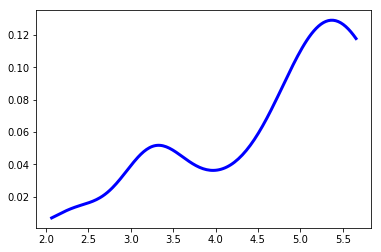

[0.00660071 0.00689258 0.00718856 0.00748804 0.0077904  0.00809498
 0.00840111 0.00870809 0.00901522 0.00932179 0.0096271  0.00993045
 0.01023117 0.01052862 0.01082221 0.01111137 0.01139561 0.01167451
 0.01194771 0.01221496 0.01247609 0.01273104 0.01297986 0.01322273
 0.01345993 0.0136919  0.01391921 0.01414254 0.01436276 0.01458082
 0.01479786 0.01501511 0.01523397 0.01545594 0.01568262 0.01591575
 0.01615715 0.01640869 0.01667236 0.01695015 0.0172441  0.01755628
 0.01788873 0.01824347 0.01862247 0.01902762 0.01946074 0.0199235
 0.02041744 0.02094394 0.02150418 0.02209914 0.02272954 0.02339587
 0.02409833 0.02483682 0.02561093 0.02641991 0.02726269 0.02813782
 0.02904351 0.02997758 0.03093751 0.0319204  0.03292299 0.03394169
 0.03497255 0.03601136 0.03705357 0.03809441 0.03912889 0.04015182
 0.0411579  0.04214172 0.04309784 0.04402085 0.0449054  0.04574627
 0.04653846 0.0472772  0.04795804 0.0485769  0.04913014 0.04961459
 0.0500276  0.05036709 0.05063158 0.05082024 0.05093285 0.05096

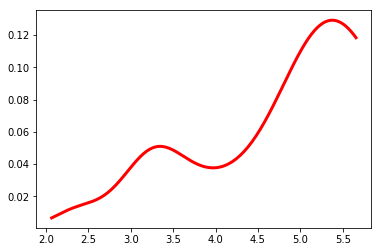

[0.00647593 0.00676156 0.00705112 0.00734402 0.00763966 0.00793738
 0.00823651 0.00853637 0.00883626 0.0091355  0.00943339 0.00972925
 0.01002243 0.01031229 0.01059826 0.0108798  0.01115643 0.01142773
 0.01169339 0.01195315 0.01220686 0.01245449 0.01269611 0.01293189
 0.01316217 0.01338737 0.01360809 0.01382504 0.01403906 0.01425116
 0.01446246 0.01467423 0.01488785 0.01510483 0.01532679 0.01555546
 0.01579266 0.01604027 0.01630025 0.0165746  0.01686536 0.01717456
 0.01750423 0.01785636 0.01823291 0.01863575 0.01906663 0.01952722
 0.02001901 0.02054333 0.02110132 0.02169391 0.02232178 0.02298535
 0.02368477 0.02441989 0.02519024 0.02599503 0.0268331  0.02770298
 0.02860281 0.02953037 0.03048309 0.03145804 0.03245193 0.03346113
 0.03448169 0.03550937 0.03653963 0.03756771 0.03858863 0.03959723
 0.04058825 0.04155633 0.0424961  0.04340219 0.04426935 0.04509246
 0.0458666  0.04658712 0.04724967 0.04785032 0.04838553 0.04885227
 0.04924803 0.04957087 0.04981944 0.04999305 0.05009162 0.0501

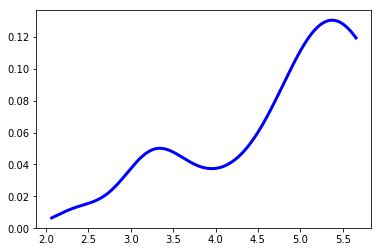

In [134]:
calc_and_show(np.asarray(stats['down']['byte_count']), 'r')
calc_and_show(np.asarray(stats['up']['byte_count']), 'b')
calc_and_show(np.asarray(stats['down']['packet_count']), 'r')
calc_and_show(np.asarray(stats['up']['packet_count']), 'b')